## Second Order Runge-Kutta Method

The Second-Order Runge-Kutta expression for $ y(x + h) $ : $$ y(x + h) = y(x) + (A + B) \cdot h \cdot f(x , y) + B \cdot P \cdot h^2 \cdot \frac{\partial f(x, y)}{\partial x} + B \cdot Q \cdot h^2 \cdot \frac{\partial f(x, y)}{\partial y} \cdot f(x, y) + \cdots $$

where $ A + B = 1 $ , $ B \cdot P = 1/2 $ , and $ B \cdot Q = 1/2 $ .

**case 1** : Choose $ A = 1/2 $. This choice leads to $ B = 1/2 , P = 1, Q = 1 $. Then the equation can be written as $$ k_1 = f(x_i, y_i) \\ k_2 = f(x_{i+1}, y_{i+1}) \\ y_{i+1} = y_i + \frac{h}{2} \cdot (k_1 + k_2) $$ 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def RK2(f, y_init, x_range, h):
    m = len(y_init)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = y_init
    
    x_soln = np.empty(0)
    x_soln = np.append(x_soln, x)

    y_soln = np.empty(0)
    y_soln = np.append(y_soln, y)

    for i in range(n):
        k_1 = f(x, y)

        ypredictor = y + k_1 * h

        k_2 = f(x+h, ypredictor)

        for j in range(m):
            y[j] = y[j] + (h/2)*(k_1[j] + k_2[j])

        x = x + h
        x_soln = np.append(x_soln, x)

        for r in range(len(y)):
            y_soln = np.append(y_soln, y[r])  

    return [x_soln, y_soln]


For given ODE $$ \frac{dy}{dx} = e^{-2x} - 2y $$

with $ y(0) = \frac{1}{10} $ on $ [0,2] $ and step size $ h = 0.2 $ :

In [7]:
def f(x, y):
    dy = np.zeros((len(y)))
    dy[0] = np.exp(-2 * x) - 2 * y[0]
    return dy

h = 0.2
x = np.array([0, 2])
y_init = np.array([1.0/10])


[xs, ys] = RK2(f, y_init, x, h)

The exact solution for the ODE :

In [8]:
dt = int((x[-1]-x[0])/h)
t = [x[0]+i*h for i in range(dt+1)]
y_exact = []
for i in range(dt+1):
    y_e = (1.0/10)*np.exp(-2*t[i]) + t[i]*np.exp(-2*t[i])
    y_exact.append(y_e)

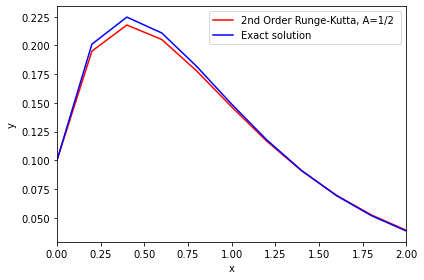

In [10]:
plt.plot(xs, ys, 'r')
plt.plot(t, y_exact, 'b')
plt.xlim(x[0], x[1])
plt.legend(["2nd Order Runge-Kutta, A=1/2 ", "Exact solution"], loc=1)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.tight_layout()
plt.show()

**case 2** : Choose $ A = 0 $. This choice leads to $ B = 1 , P = 1/2 , Q = 1/2 $. Then the equation can be written as $$ k_1 = y(x_i , y_i) \\ k_2 = y(x_i + \frac{1}{2}h ,y_i + \frac{1}{2}hk_1) \\ y_{i+1} = y_{i} + hk_2 $$ 

In [11]:
def RK2(f, y_init, x_range, h):
    m = len(y_init)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = y_init
    
    x_soln = np.empty(0)
    x_soln = np.append(x_soln, x)

    y_soln = np.empty(0)
    y_soln = np.append(y_soln, y)

    for i in range(n):
        k_1 = f(x, y)

        ypredictor = y + k_1 * h * 1/2

        k_2 = f(x + 1/2 *h, ypredictor)

        for j in range(m):
            y[j] = y[j] + h * k_2[j]

        x = x + h
        x_soln = np.append(x_soln, x)

        for r in range(len(y)):
            y_soln = np.append(y_soln, y[r])  

    return [x_soln, y_soln]

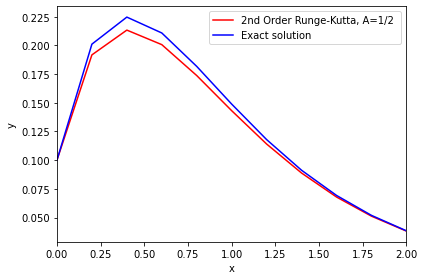

In [12]:
def f(x, y):
    dy = np.zeros((len(y)))
    dy[0] = np.exp(-2 * x) - 2 * y[0]
    return dy

h = 0.2
x = np.array([0, 2])
y_init = np.array([1.0/10])


[xs, ys] = RK2(f, y_init, x, h)

dt = int((x[-1]-x[0])/h)
t = [x[0]+i*h for i in range(dt+1)]
y_exact = []
for i in range(dt+1):
    y_e = (1.0/10)*np.exp(-2*t[i]) + t[i]*np.exp(-2*t[i])
    y_exact.append(y_e)

plt.plot(xs, ys, 'r')
plt.plot(t, y_exact, 'b')
plt.xlim(x[0], x[1])
plt.legend(["2nd Order Runge-Kutta, A=1/2 ", "Exact solution"], loc=1)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.tight_layout()
plt.show()   